In [10]:
import torch
import random
import numpy as np  # numpy
import torch.nn as nn  # nn objects
import torch.optim as optim  # nn optimizers
import matplotlib.pyplot as plt
%matplotlib notebook

## custom packages ##
from networkUtils import recurrentNet as rn
from taskUtils import generate as gen
from trainUtils import trainer as tn
from testUtils import test, plot

# Set device to gpu if possible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# Hyperparameters
input_size = 5
num_classes = 2  # the number of units in the output layer
hidden_size = 10  # the number of units in the recurrent layer
batch_size = 1  # batch size = # of samples to average when computing gradient
num_layers = 1  # number of stacked RNN layers
eta = 0.001  # learning rate
epochs = 500  # epochs = # of full pases through dataset

In [4]:
# creating the networks
# general_net = net1 = net2 = net3 = net4 = rn.RecurrentXORNet(input_size, hidden_size, num_layers, num_classes, batch_size).to(device)
net1 = rn.RecurrentXORNet(input_size, hidden_size, num_layers, num_classes, batch_size).to(device)
net2 = rn.RecurrentXORNet(input_size, hidden_size, num_layers, num_classes, batch_size).to(device)
net3 = rn.RecurrentXORNet(input_size, hidden_size, num_layers, num_classes, batch_size).to(device)
net4 = rn.RecurrentXORNet(input_size, hidden_size, num_layers, num_classes, batch_size).to(device)

# Loss function, optimizer, and schedule (for decaying learning rate)
criterion = nn.CrossEntropyLoss()  # loss function

# general_optimizer = optimizer1 = optimizer2 = optimizer3 = optimizer4 = optim.Adam(general_net.parameters(), eta)  # tells optimizer to adjust all parameter weights with steps based on eta
optimizer1 = optim.Adam(net1.parameters(), eta)  # tells optimizer to adjust all parameter weights with steps based on eta
optimizer2 = optim.Adam(net2.parameters(), eta)  # tells optimizer to adjust all parameter weights with steps based on eta
optimizer3 = optim.Adam(net3.parameters(), eta)  # tells optimizer to adjust all parameter weights with steps based on eta
optimizer4 = optim.Adam(net4.parameters(), eta)  # tells optimizer to adjust all parameter weights with steps based on eta

sheduler1 = optim.lr_scheduler.ReduceLROnPlateau(optimizer1, patience=5, verbose=False) # lowers lr if the loss global min doesn't decrease for 5 epochs
sheduler2 = optim.lr_scheduler.ReduceLROnPlateau(optimizer2, patience=5, verbose=False) # lowers lr if the loss global min doesn't decrease for 5 epochs
sheduler3 = optim.lr_scheduler.ReduceLROnPlateau(optimizer3, patience=5, verbose=False) # lowers lr if the loss global min doesn't decrease for 5 epochs
sheduler4 = optim.lr_scheduler.ReduceLROnPlateau(optimizer4, patience=5, verbose=False) # lowers lr if the loss global min doesn't decrease for 5 epochs

# generate takes in inputs of: same_distractions, input_size, seqlen1, seqlen2, seqlen3
dataset1, targets1, sequence_length1 = gen.generate_dataset(False, input_size, 5, 45, 0) # small first train, large second train
dataset2, targets2, sequence_length2 = gen.generate_dataset(False, input_size, 45, 5, 0) # large first train, small second train
dataset3, targets3, sequence_length3 = gen.generate_dataset(False, input_size, 25, 25, 0) # evenly spaced trains
dataset4, targets4, sequence_length4 = gen.generate_dataset(False, input_size, 0, 50, 0) # large train in the middle

In [5]:
# trainer takes in inputs of: network, dataset, targets, sequence_length, input_size, batch_size, epochs, optimizer, criterion, sheduler
print("First network: \n")
loss1 = tn.train_network(net1, dataset1, targets1, sequence_length1, input_size, batch_size, epochs, optimizer1, criterion, sheduler1)
print("\nSecond network: \n")
loss2 = tn.train_network(net2, dataset2, targets2, sequence_length2, input_size, batch_size, epochs, optimizer2, criterion, sheduler2)
print("\nThird network: \n")
loss3 = tn.train_network(net3, dataset3, targets3, sequence_length3, input_size, batch_size, epochs, optimizer3, criterion, sheduler3)
print("\nFourth network: \n")
loss4 = tn.train_network(net4, dataset4, targets4, sequence_length4, input_size, batch_size, epochs, optimizer4, criterion, sheduler4)

First network: 

Cost at epoch 0 is 0.7156804203987122
Cost at epoch 125 is 0.02926252782344818
Cost at epoch 250 is 0.007892146706581116
Cost at epoch 375 is 0.0034209813456982374
Cost at epoch 499 is 0.0018356190994381905

Second network: 

Cost at epoch 0 is 0.723135232925415
Cost at epoch 125 is 0.040513776242733
Cost at epoch 250 is 0.00979301705956459
Cost at epoch 375 is 0.004078403115272522
Cost at epoch 499 is 0.0022411360405385494

Third network: 

Cost at epoch 0 is 0.7171404361724854
Cost at epoch 125 is 0.021335775032639503
Cost at epoch 250 is 0.00553632527589798
Cost at epoch 375 is 0.0024990977253764868
Cost at epoch 499 is 0.0015456826658919454

Fourth network: 

Cost at epoch 0 is 0.6895761489868164
Cost at epoch 125 is 0.03814653307199478
Cost at epoch 250 is 0.007847827859222889
Cost at epoch 375 is 0.003346465528011322
Cost at epoch 499 is 0.0018212973373010755


<IPython.core.display.Javascript object>


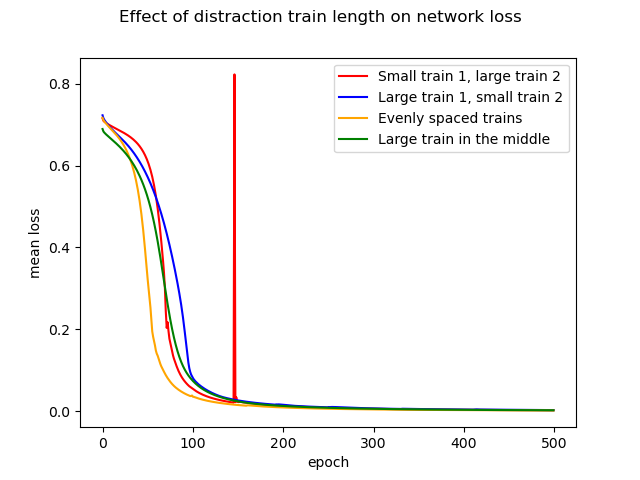

In [11]:
# plot losses
plot.plot_four_losses("Effect of distraction train length on network loss", 
                 loss1, loss2, loss3, loss4)
plt.legend(["Small train 1, large train 2", "Large train 1, small train 2", "Evenly spaced trains", "Large train in the middle"])
plt.show()

In [7]:
# Tests rounded network outputs against correct network outputs based on sample
# test takes in inputs of: sample_number, dataset, targets, network, input_size, batch_size, sequence_length
test.test_network(random.randint(0, 3), dataset1, targets1, net1, input_size, batch_size, sequence_length1)



Test of network: 
input is [[[7.00754881e-01 8.83018136e-01 8.70233774e-03 6.94541991e-01
   7.55332470e-01]
  [5.88959038e-01 4.38290536e-01 7.47311294e-01 5.40106773e-01
   6.29223645e-01]
  [7.31575489e-02 4.95512486e-01 1.28026247e-01 9.22537148e-01
   4.65440750e-03]
  [9.41878200e-01 2.40615606e-02 3.35376263e-01 1.73838615e-01
   2.03784168e-01]
  [3.97526920e-01 7.04666734e-01 2.24865198e-01 6.23373687e-01
   4.88139451e-01]
  [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
   0.00000000e+00]
  [6.27160370e-01 7.74261951e-02 2.85100341e-01 9.28627312e-01
   3.75314355e-02]
  [9.46643591e-01 5.33829451e-01 3.47938240e-01 9.34664965e-01
   2.84069777e-02]
  [5.56085587e-01 3.44988644e-01 5.88754714e-01 9.11163688e-02
   5.46550393e-01]
  [1.23099089e-01 7.30380893e-01 7.00607598e-01 3.99528146e-02
   3.12328637e-01]
  [1.47945404e-01 7.41996527e-01 9.61610794e-01 8.24383140e-01
   9.07831788e-01]
  [9.32736039e-01 3.72318923e-01 5.33720791e-01 2.70566940e-02
   4.6